# Quantum Method of Lines

In [1]:
# Math and graphing tools
import numpy as np
import matplotlib.pyplot as plt
from math import pi

import ivp

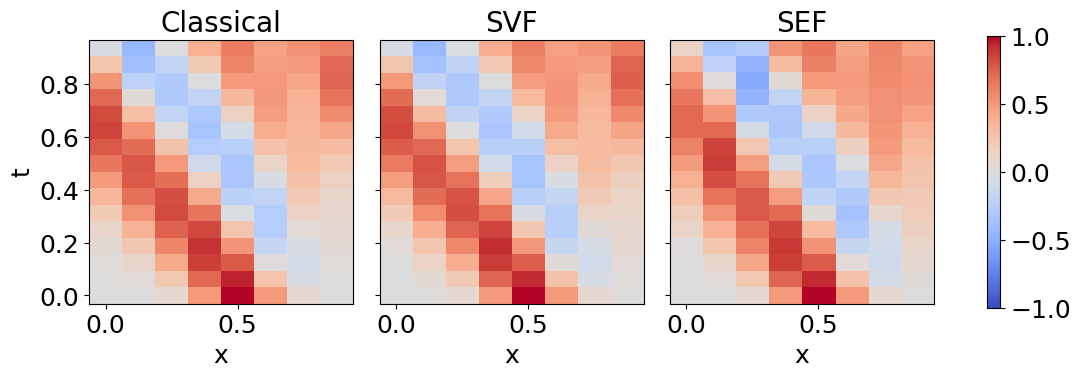

In [6]:
n = 3
M = 3
N = 2**n
Nt = 2* N

a = 0.15
def phi(x):
    return np.exp(-(x-0.5)**2/a**2)
def P(x):
    return 0.0*x+0.00001#(2.0*(x-0.5)/a**2)*np.exp(-(x-0.5)**2/a**2)
def Q(x):
    return (-2.0*(x-0.5)/a**2)*np.exp(-(x-0.5)**2/a**2)

IVP = ivp.Initial_Value_Problem(equation_name='advection',
                                NE=1,n=n,M=M,CFL=0.5,Nt=Nt,
                                initial_functions_array=[phi],
                                tol=1e-6,
                                shots=1000000000,
                                results_dir='Advection/Data/',
                                graphs_dir='Advection/Graphs/')

IVP.evolveWithSampling()
IVP.evolveWithStateVector()
IVP.evolveClassically()

IVP.plotEvolution(EqNum=0,formalisms=[0,1,2])


4


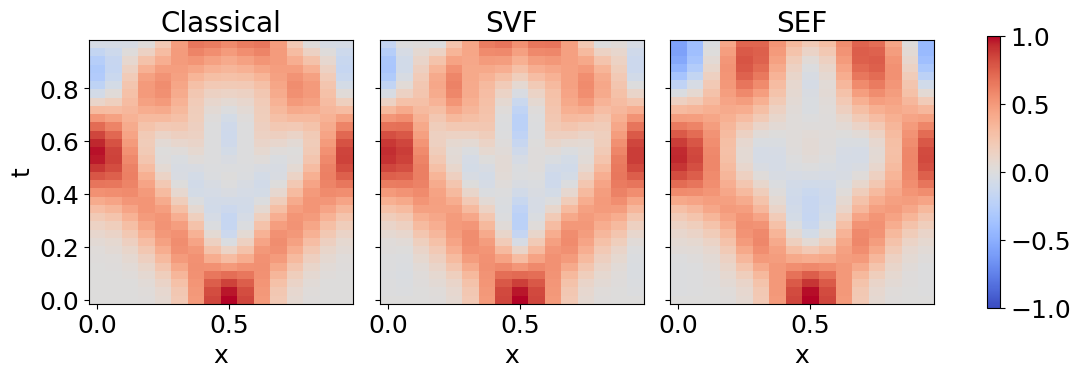

5


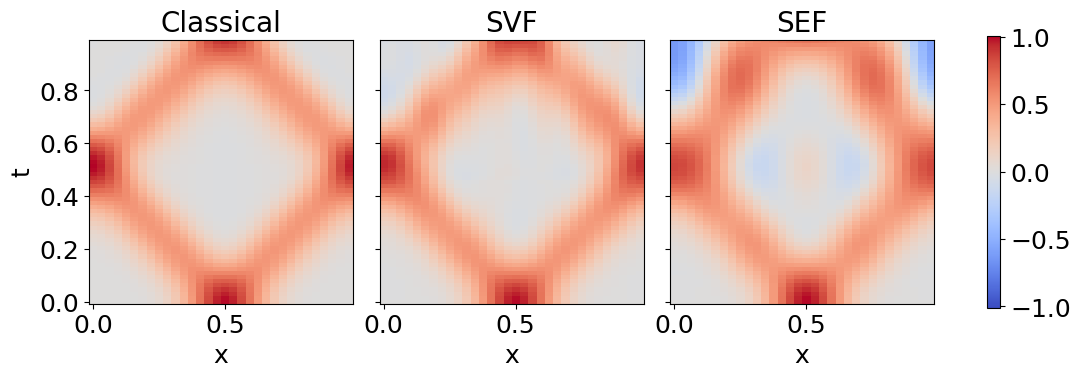

6


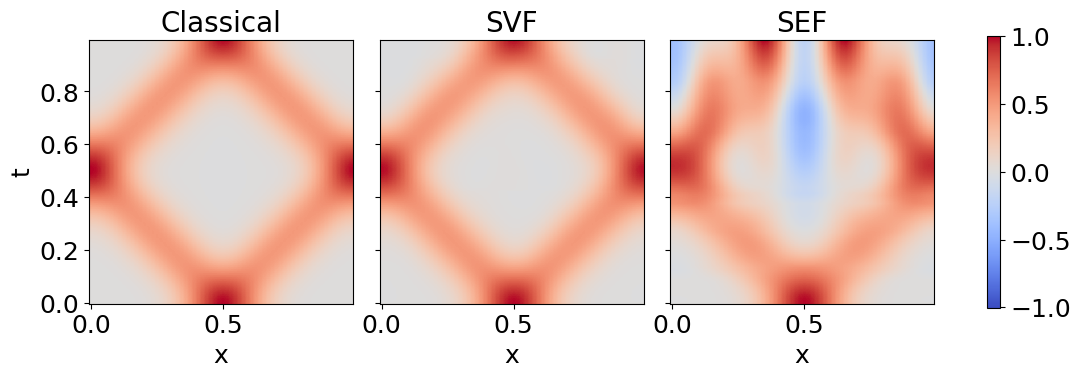

In [9]:
"""
In this code block, we define the ansatz of the wave function. That is, 
the unitary gate U(λ)
"""

# We first define de number of qbits that are going to be used to store the
# wave function psi(x).
#n = 3 # number of qbits
M = 7    # number of qbits storing fourier coeficients, 2**m is the number of terms
#N = 2**n 
#Nt = 2*N

a = 0.15
def phi(x):
    return np.exp(-(x-0.5)**2/a**2)
def P(x):
    return 0.0*x+0.00001#(2.0*(x-0.5)/a**2)*np.exp(-(x-0.5)**2/a**2)
def Q(x):
    return (-2.0*(x-0.5)/a**2)*np.exp(-(x-0.5)**2/a**2)

for n in range(4,7):
    print(n)
    N = 2**n 
    Nt = 2*N
    IVP = ivp.Initial_Value_Problem(equation_name='wave',
                                NE=3,n=n,M=M,CFL=0.5,Nt=Nt,
                                   initial_functions_array=[P,Q,phi],
                                   tol=1e-6,
                                   shots=1000000000,
                                   results_dir='Wave/Data/',
                                    graphs_dir='Wave/Graphs/')
    #IVP.print_timeSteps = True
    #IVP.evolveWithSampling()
    IVP.evolveWithStateVector()
    #IVP.evolveClassically()
    IVP.plotEvolution(EqNum=2,formalisms=[0,1,2])

#IVP.plotState(IVP.FastStateVector(IVP.l0[2]))
#IVP.print_timeSteps = True

#IVP.evolveWithSampling()
#IVP.evolveWithStateVector()
#IVP.evolveClassically()

#IVP.plotEvolution(EqNum=2,formalisms=[0,1,2])



In [16]:
IVP.formalism = 2
IVP.shots = int(1e8)
for i in range(10):
    print(IVP.CF(IVP.l0[0],1,2))

-0.00038567838791542643
-0.0005283043957330869
-0.0004652376035564541
-0.0005304499741731901
-0.0005050679005636333
-0.00044715369450452935
-0.0004854337264511121
-0.0004610503973469653
-0.00041922997219258427
-0.00040751057665856636


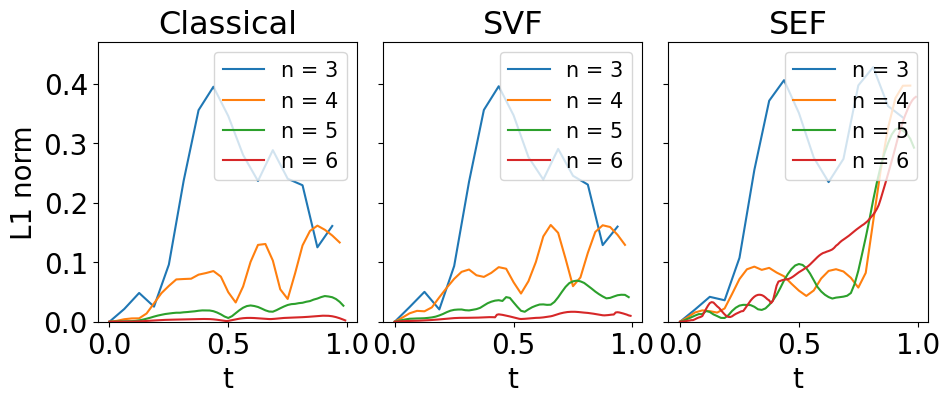

In [13]:
def f_exact(x,t):
    result =  0.5* np.exp(-(x-0.5-t)**2/0.15**2) + 0.5*np.exp(-(x-0.5+t)**2/0.15**2)\
    + 0.5* np.exp(-(x+0.5-t)**2/0.15**2) + 0.5*np.exp(-(x-1.5+t)**2/0.15**2)
    return result

        
ivp.convergeceTest(ni=3,nf=6,M_in=7,EqNum=2,formalisms=[0,1,2],f_exact=f_exact)

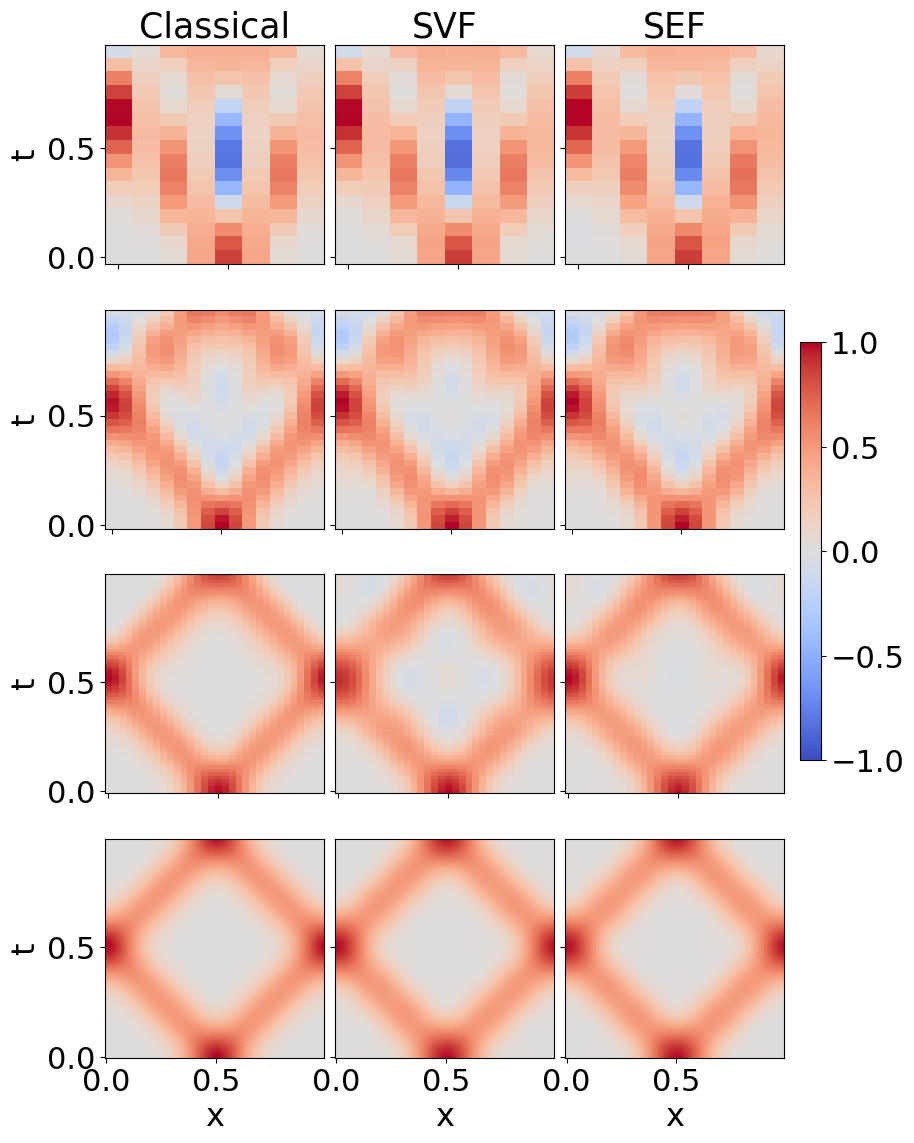

In [5]:
import numpy as np
import matplotlib.pyplot as plt

equation = 'wave' # advection, wave, burgers
M = 3
ni = 3
nf = 6
nrows = nf-ni+1
#formalism = 'state_vector' # classical, state_vector, sampling

fig, ax = plt.subplots(nrows = nrows,ncols=3,figsize=(9.3, 12.3))
plt.subplots_adjust(left=0.12, right=1.00,wspace=0.05,hspace=0.05,top=0.95,bottom=0.1)

titulo = 25
ejes = 23
legenda = 14
ticksSize = 22


filepaths = []
for i in range(nrows):
    filepaths.append([0,0,0])
    
formalisms = ['classical', 'state_vector', 'sampling']
titles = ['Classical','SVF','SEF']
for i in range(nrows):
    for j in range(3):
        filepaths[i][j] = 'Data'+"/{}_n{}M{}.npy".format(formalisms[j],ni+i,M)

for i in range(nrows):
    for j in range(3):
        if equation == 'advection':
            f = np.load(filepaths[i][j])
        elif equation == 'wave':
            f = np.load(filepaths[i][j])[2]
        else:
            f = np.load(filepaths[i][j])[0]
        
        f = np.flipud(f)

        N = 2**(i+3)
        xmin = -0.5/float(N)
        xmax = 1.0+xmin
        tmin = -0.25/float(N)
        tmax = tmin + 1.0
        aspect_ratio = (xmax-xmin) / (tmax-tmin)
        vmax = np.max(np.abs(f))
        
        if equation != 'burgers':
            cmap = 'coolwarm'
            vmin = -vmax
        else:
            cmap = 'gray_r'
            vmin = 0.0

        im = ax[i,j].imshow(f, cmap=cmap,extent=[xmin,xmax,tmin,tmax], vmin=vmin,vmax=vmax,aspect=aspect_ratio)

        ax[i,j].tick_params(axis='both', labelsize=ticksSize)
        if i == 0:
            ax[i,j].set_title(titles[j],fontsize=titulo)

        if i == (nrows-1):
            ax[i,j].set_xlabel('x', fontsize=ejes)
            ax[i,j].set_xticks(np.arange(0, 1, 0.5))
        else:
            ax[i,j].xaxis.set_ticklabels([])  # Set tick labels to an empty list

        if j == 0:
            ax[i,j].set_ylabel('t', fontsize=ejes)
        else:
            ax[i,j].yaxis.set_ticklabels([])  # Set tick labels to an empty list
        
cbar = fig.colorbar(im, ax=ax.ravel().tolist(),shrink=0.4,pad=0.02)  # Use any of the images to generate the colorbar
cbar.ax.tick_params(labelsize=ticksSize)

#fig.savefig('Graphs/Giant.png', dpi=300)
plt.show()

In [7]:
a = np.array([1,2])

In [10]:
print(np.sum(np.abs(a)**2)**1)

5
